In [143]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from torch import nn
from tqdm import tnrange
import torch.nn.functional as F
import torch
from torch.distributions import Categorical

In [144]:
seed = 761
torch.manual_seed(seed)

In [148]:
distribution = np.load('distribution.npy')

In [149]:
distribution_ravel = distribution.ravel()
random_samples = np.random.choice(np.arange(len(distribution_ravel)), size=100000, p=distribution_ravel)

x1 = random_samples // 200
x2 = random_samples % 200

x = np.array([[x1[i], x2[i]] for i in range(len(x1))])

In [150]:
train_dataset, val_dataset = train_test_split(x, train_size=0.8, random_state=seed)
train_dataset, test_dataset = train_test_split(train_dataset, train_size=0.75, random_state=seed)

print("Train size:", len(train_dataset))
print("Validation size:", len(val_dataset))
print("Test size:", len(test_dataset))

Train size: 60000
Validation size: 20000
Test size: 20000


In [151]:
batch_size = 100

In [152]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    drop_last=False, 
    shuffle=True, 
    num_workers=4)

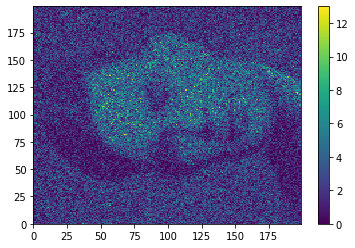

In [153]:
hist_samples = plt.hist2d(x1, x2, bins=200)
plt.colorbar(hist_samples[3])
plt.show()